In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['feature_names', 'DESCR', 'data', 'target'])


In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston['house_price'] = boston_dataset.target

### Data preprocessing

In [6]:
boston.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

### Exploratory data analysis

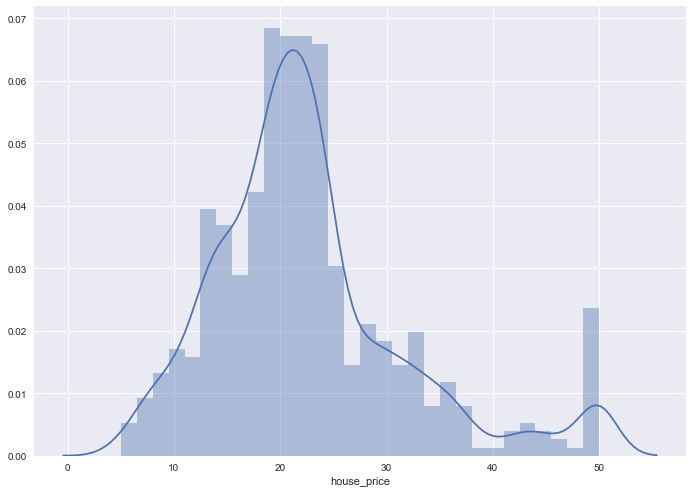

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['house_price'], bins=30)
plt.show()

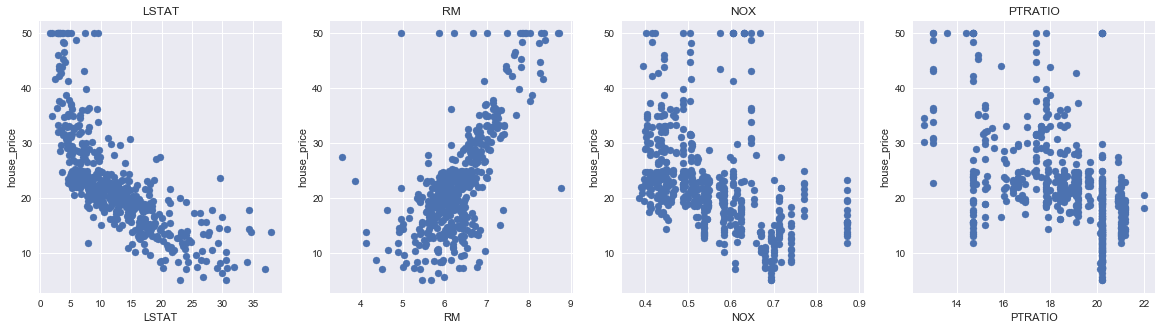

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'NOX', 'PTRATIO']
target = boston['house_price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('house_price')

### Preparing the data for training the model

In [9]:
X = boston.drop('house_price', axis=1)
Y = boston['house_price']

### Splitting the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Training and testing the model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model evaluation

In [12]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print("Training score: {}".format(lin_model.score(X_train, Y_train)))
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print("Test score: {}".format(lin_model.score(X_test, Y_test)))
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
Training score: 0.7383590299644474
RMSE is 4.740823080328722


The model performance for testing set
--------------------------------------
Test score: 0.7330206818709295
RMSE is 4.571962782041523


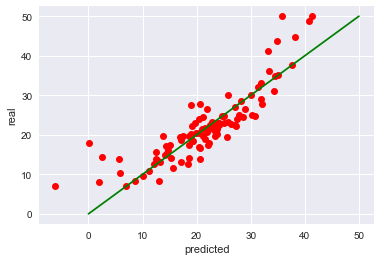

In [13]:
# Plot outputs
%matplotlib inline
plt.plot(y_test_predict, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

### l1 Regularization or Lasso Regression

The question we need to ask ourselves is which of our features are relevant to our model, and which are not.

l1 regularization tries to answer this question by driving the values of certain coefficients down to 0. This eliminates the least important features in our model. We will create a pipeline similar to the one above, but using Lasso. You can play around with the value of alpha, which can range from 0.1 to 1.

In [14]:
# Create linear regression object with a lasso coefficient 0.5
ridge = Lasso(fit_intercept=True, alpha=0.001)

# Train the model using the training set
ridge.fit(X_train, Y_train)
pred_ridge = ridge.predict(X_test)

print('Training score: {}'.format(ridge.score(X_train, Y_train)))
print('Test score: {}'.format(ridge.score(X_test, Y_test)))

Training score: 0.7383543483049293
Test score: 0.7327059960168585


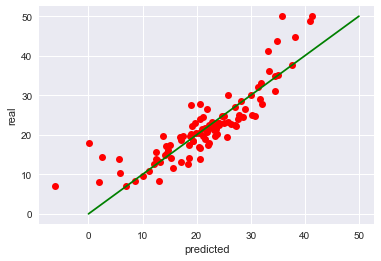

In [15]:
plt.plot(pred_ridge, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()